This notebook was made mainly by DATAI Team for an udemy course. I have translated to English, changed some examples and edited the images.

## Content
* [Sequence Models](#1)
* [Recurrent Neural Network (RNN)](#2)
* [Implementing Recurrent Neural Network with Keras](#3)
    * [Loading and Preprocessing Data](#31)
    * [Create RNN Model](#32)
    * [Predictions and Visualising RNN Model](#33)
* [Long Short Term Memory (LSTMs)](#4)
* [Implementing Long Short Term Memory with Keras](#99)
    * [Loading and Visualizing Data](#41)
    * [Preprocessing Data](#42)
    * [Create LSTM Model](#43)
    * [Predictions and Visualising LSTM Model](#44)
* [Conclusion](#6)

<a id="1"></a>
# Sequence Models
* Sequence models are used for time dependent data.
* Speech recognition, natural language process (NLP), music generation
* Apples Siri and Google's voice search
* Sentiment classification, for example: "This is the most interesting Neural Network type"

<a id="2"></a>
# Recurrent Neural Network (RNN)
* RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.
* This is the reason why they are the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more because they can form a much deeper understanding of a sequence and its context, compared to other algorithms.
* Not only feeds output but also gives feed backs into itself. Because RNN has internal memory
* Temporal loop feeds itself.
* 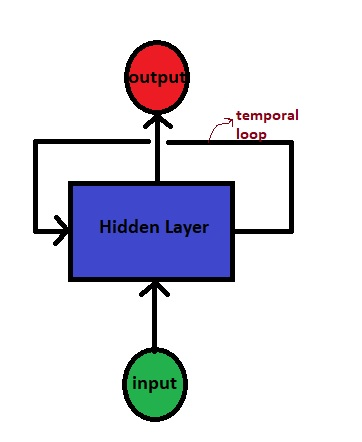
* They have memory. Short term memory remembers what happened on the previous node.
* Why is it important to remember the past? Because we learn on what we have learned. You can think of RNN as the same logic.
* 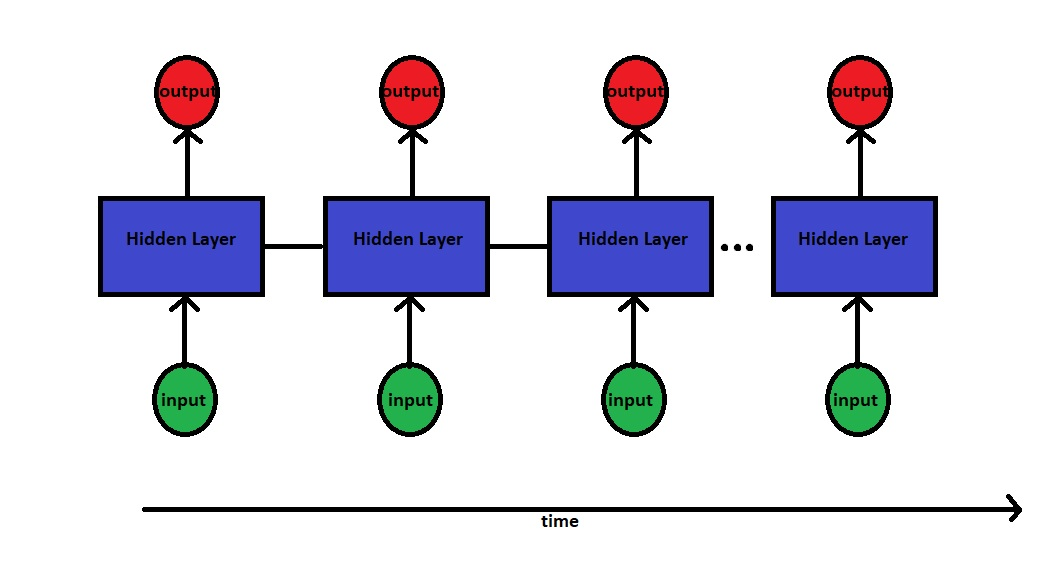
* Let's look at example RNN structures
* One to Many
    * Music Generation: Initially, the model's input is a specific note or chord. The model takes the input and predicts the next note or chord. The predicted note or chord becomes the input for the next step. This process continues over a certain duration, creating a sequence of consecutive notes or chords.
    * 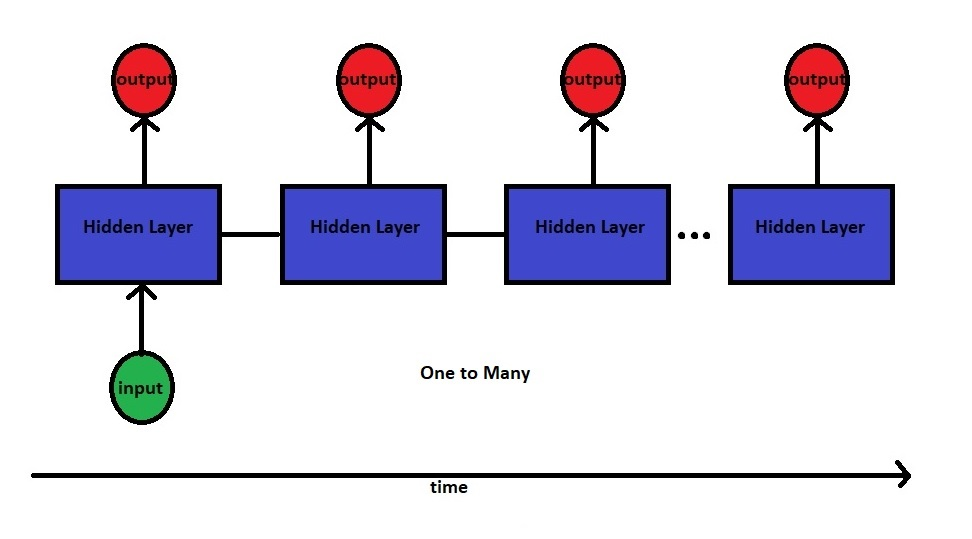
* Many to One
    * Speech Emotion Recognition: This sequence encodes information about how the sound changes over time and which audio features might indicate a particular emotional state. As the RNN progresses through the entire sequence, it attempts to understand the patterns and changes in the audio features across the sequence. The hidden state or output at the final time step represents the overall emotional content of the entire sequence, allowing you to predict the emotional state based on this output.
    * 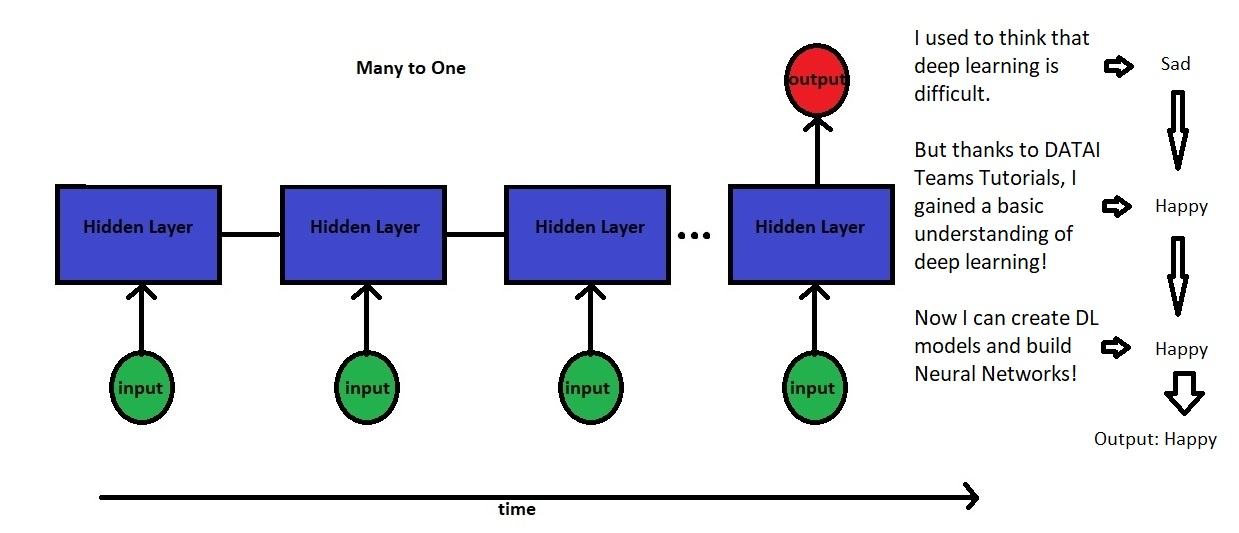
* Many to Many
    * Translate: In this case, the input sentence is given in English, and the output sentence is generated in Turkish. Each word from the input sentence is taken, and the corresponding Turkish word is generated. "Many to Many" RNN models are particularly effective when dealing with sequential data on both input and output sides. These models can help capture complex relationships in various applications.
    * 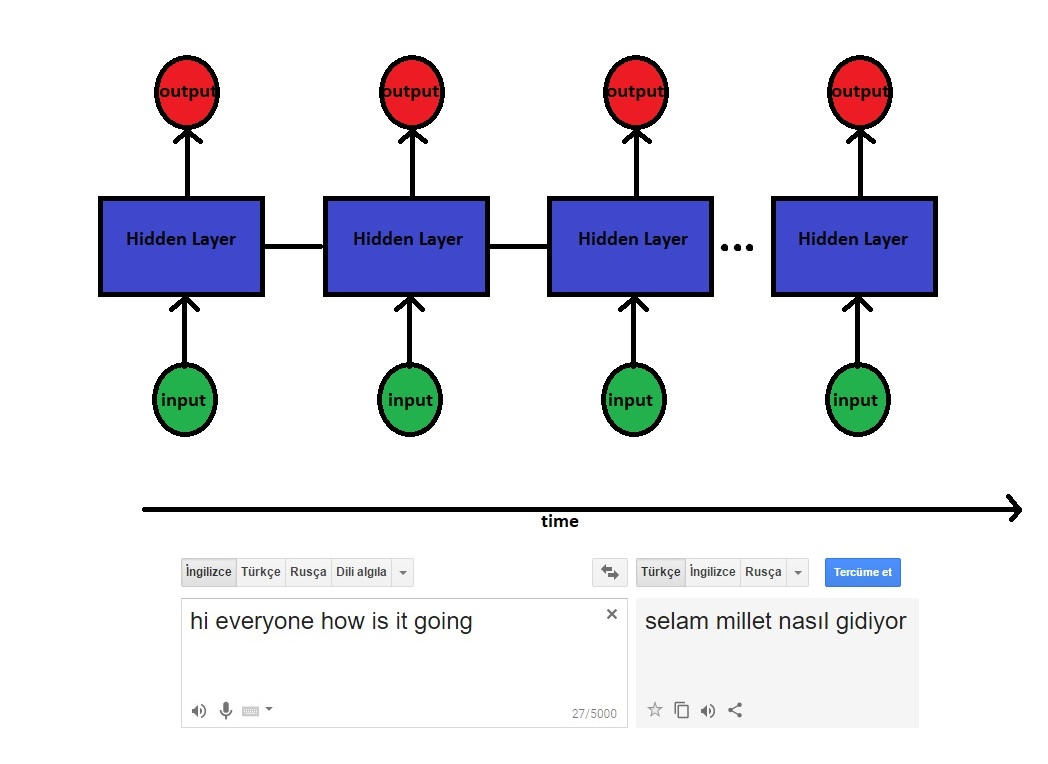
* RNN has short term memory but LSTM can have long term memory.

* Exploiding Gradients: A situation where the gradient is too large. It gives importance to certain weights unnecessarily.
* Vanishing Gradients: A situation where the gradient is too small. Model learns slowly.
* Gradient: Change in weights according to cost.

<a id="3"></a>
# Implementing Recurrent Neural Network with Keras
* [Loading and Preprocessing Data](#31)
* [Create RNN Model](#32)
* [Predictions and Visualising RNN Model](#33)

<a id="31"></a>
### Loading and Preprocessing Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the training set
dataset_train = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

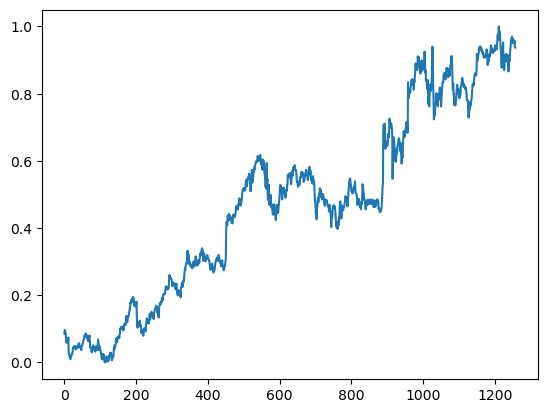

In [6]:
plt.plot(train_scaled)
plt.show()

In [7]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

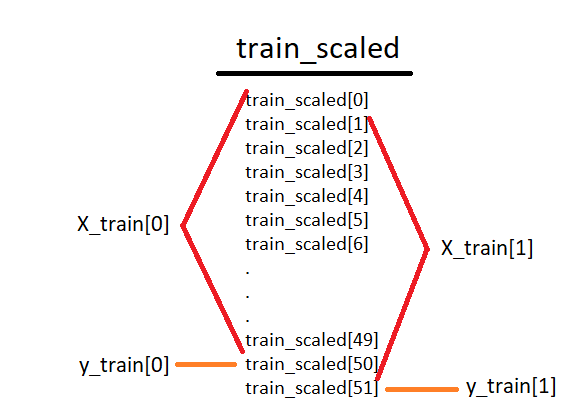

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [9]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

<a id="32"></a>
### Create RNN Model

In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 60ms/step - loss: 0.4313
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 0.2722
Epoch 3/100
38/38 [==============================] - 2s 59ms/step - loss: 0.2010
Epoch 4/100
38/38 [==============================] - 2s 59ms/step - loss: 0.1447
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.1189
Epoch 6/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0892
Epoch 7/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0653
Epoch 8/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0639
Epoch 9/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0544
Epoch 10/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0428
Epoch 11/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0423
Epoch 12/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0360
Epoch 13/100
38/38 [=====

<a id="33"></a>
### Predictions and Visualising RNN Model

In [11]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [13]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

1/1 [==============================] - 1s 550ms/step


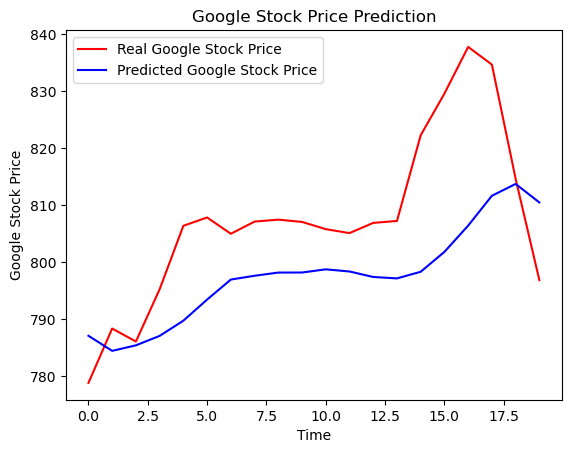

In [14]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250 daha güzel sonuç veriyor.

<a id="4"></a>
# Long Short Term Memory (LSTMs)
* LSTM is variant of RNN.
* LSTM has long term memory diffrent than RNN. 
* LSTM architecture:
    * x: scaling of information
    * +: Adding information
    * sigmoid layer.It is used to remember or forget something from sigmoid memory. It is 1 or 0.
    * tanh: activation function tanh. Tanh solves the vanishing gradient (slow learning). Because we were taking derivatives while updating the parameters. The derivative of Tanh does not immediately reach zero.
    * h(t-1): output of LSTM unit
    * c(t-1): memory from previous LSTM unit
    * X(t): input
    * c(t): new updated memory
    * h(t): output
    * From c(t-1) to c(t) is memory pipeline. or only memory.
    * Arrows are vektor.
    * h(t-1) and X(t) don't converge, you can think of them as two parallel paths.
* 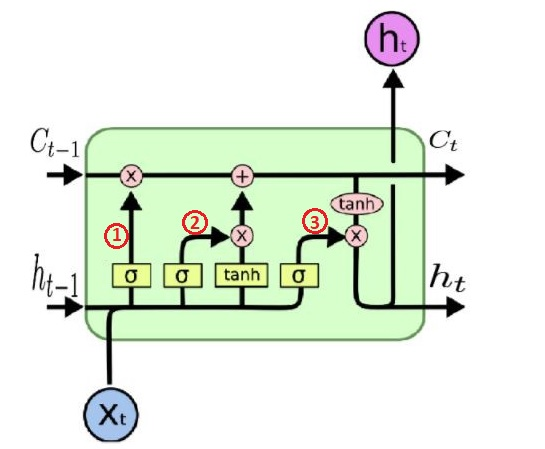
* 1) Forget gate: Takes X(t) and h(t-1) as input. Decides whether the incoming information will be forgotten or not.
* 2) Input gate: It decides which information will be stored in memory or not.
* 3) Output gate: It decides which information will be output or not.
* For example: 
    * ... "Boys are watching TV"
    * "On the other hand girls are playing baseball."
    * Forget "boys". new input is "girls" and output is "girls"

<a id="99"></a>
# Implementing Long Short Term Memory with Keras
* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

<a id="41"></a>
### Loading and Visualizing Data

In [15]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
data = pd.read_csv('/kaggle/input/international-airline-passengers/international-airline-passengers.csv',skipfooter=5) # The last 5 data was contaminated
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


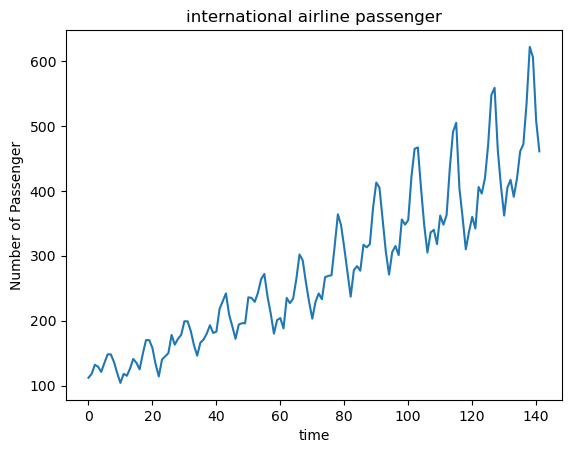

In [17]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data
* Reshape
* Change type
* Scaling
* Train test split
* Create dataset

In [18]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [19]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [21]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  


In [22]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [23]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

<a id="43"></a>
### Create LSTM Model

In [24]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 2s 2ms/step - loss: 0.0143
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 12/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 13/50
60/60 [==============================

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [25]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 4ms/step
Train Score: 16.81 RMSE
Test Score: 39.87 RMSE


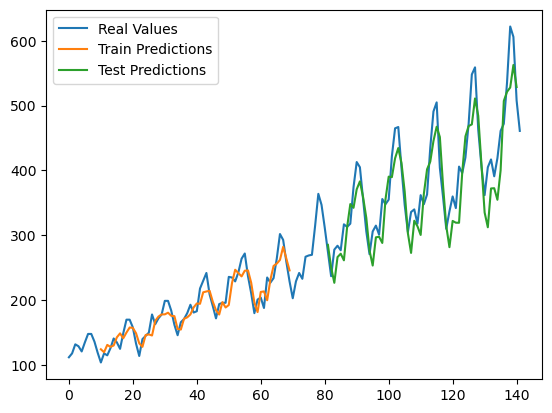

In [26]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label = "Real Values")
plt.plot(trainPredictPlot, label = "Train Predictions")
plt.plot(testPredictPlot, label = "Test Predictions")
plt.legend()
plt.show()

<a id="6"></a>
# Conclusion
Thank you for reading this kernel, I would love to hear your replies